* np.where
* groupby().agg()
* assign

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
welfare = pd.read_spss('/users/jjong/desktop/vscode/CWNU_ICT/Koweps_hpwc14_2019_beta2.sav')
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [14]:
welfare = welfare.rename(columns={'h14_g3':'sex', 'h14_g4':'birth', 'h14_g10':'merrige_type',
                                  'h14_g11':'religion', 'p1402_8aq1':'income', 'h14_eco9':'code_job',
                                  'h14_reg7':'code_region'})
welfare = welfare[['sex','birth','merrige_type','religion','income','code_job','code_region']]

In [16]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [18]:
welfare['sex'] = np.where(welfare['sex']==1, 'male', 'female')
welfare

,sex,birth,merrige_type,religion,income,code_job,code_region
0,female,1945.0,2.0,1.0,NaN,NaN,1.0
1,male,1948.0,2.0,2.0,NaN,NaN,1.0
2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0
4,female,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,1.0,1.0,NaN,NaN,5.0
14414,female,1992.0,5.0,1.0,NaN,NaN,5.0
14415,male,1995.0,5.0,1.0,NaN,910.0,5.0
14416,female,1998.0,5.0,1.0,200.0,246.0,5.0


<Axes: xlabel='sex', ylabel='count'>

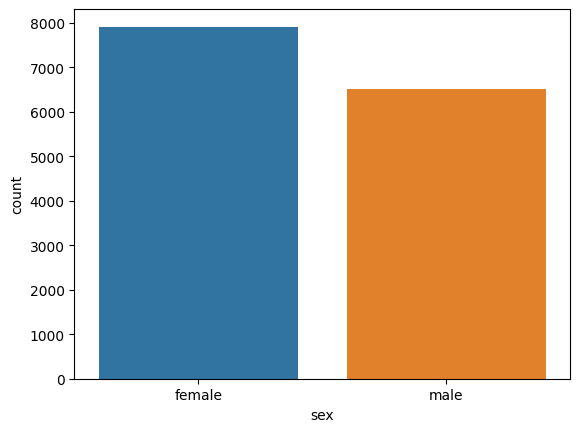

In [21]:
sns.countplot(welfare, x='sex')

<Axes: xlabel='income', ylabel='Count'>

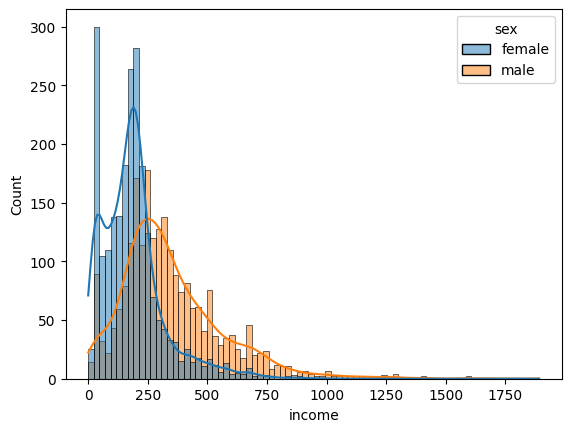

In [24]:
sns.histplot(welfare, x='income', kde=True, hue='sex')

In [26]:
welfare = welfare.dropna(subset=['income'])

sex_income = welfare.groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

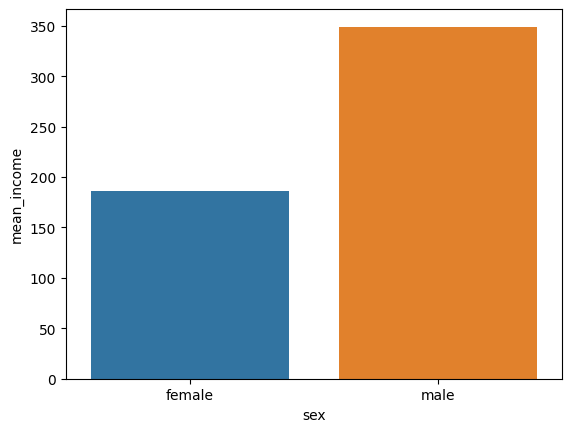

In [30]:
sns.barplot(sex_income, x='sex', y='mean_income')

In [31]:
welfare['birth'].describe()

count    4534.000000
mean     1971.144685
std        15.290056
min      1928.000000
25%      1961.000000
50%      1972.000000
75%      1982.000000
max      2001.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

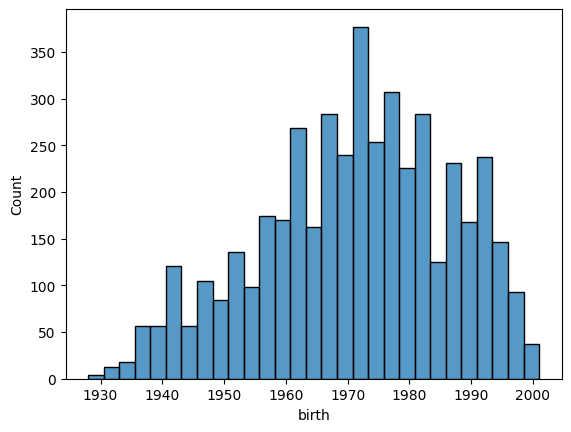

In [32]:
sns.histplot(welfare, x='birth')

# 파생변수

In [33]:
# 파생변수
welfare = welfare.assign(age = 2023 - welfare['birth'] + 1)
welfare

,sex,birth,merrige_type,religion,income,code_job,code_region,age
2,male,1942.0,3.0,1.0,107.0,762.0,1.0,82.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0,62.0
7,female,1934.0,1.0,1.0,27.0,941.0,1.0,90.0
8,female,1940.0,2.0,1.0,27.0,999.0,2.0,84.0
14,male,1978.0,1.0,2.0,338.0,312.0,1.0,46.0
...,...,...,...,...,...,...,...,...
14401,male,1966.0,1.0,1.0,280.0,874.0,6.0,58.0
14402,female,1962.0,1.0,1.0,209.0,930.0,6.0,62.0
14405,female,1947.0,2.0,2.0,27.0,941.0,6.0,77.0
14410,male,1956.0,1.0,1.0,200.0,854.0,6.0,68.0


<Axes: xlabel='age', ylabel='Count'>

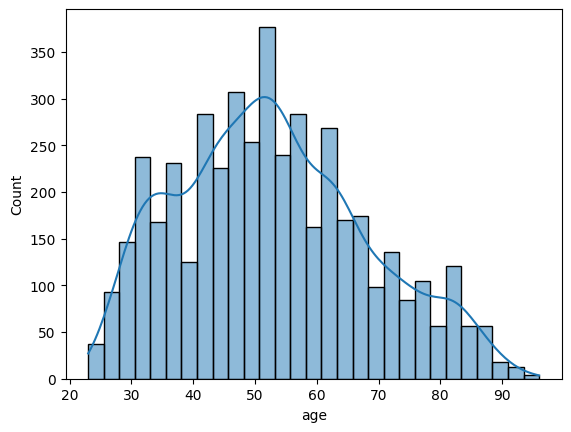

In [38]:
sns.histplot(welfare, x='age', kde=True)

<Axes: xlabel='age', ylabel='mean_income'>

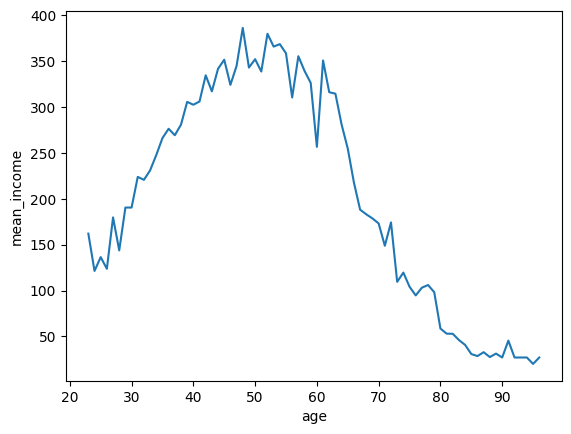

In [41]:
age_income = welfare.groupby('age').agg(mean_income=('income', 'mean'))
age_income
sns.lineplot(age_income, x='age', y='mean_income')

In [45]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                         np.where(welfare['age'] <= 59, 'middle', 'old')))
welfare['ageg'].value_counts()

ageg
middle    2897
old       1447
young      190
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

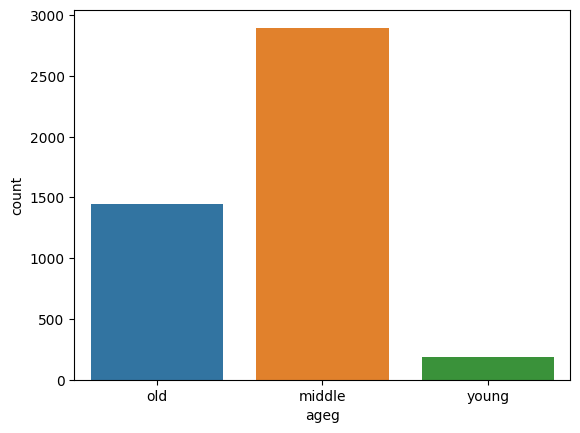

In [46]:
sns.countplot(welfare, x='ageg')

In [47]:
ageg_income = welfare.groupby('ageg', as_index=False).agg(mean_income=('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,318.787366
1,old,181.846579
2,young,160.610526


In [49]:
welfare[(welfare['income'] >= 500) & (welfare['ageg'] == 'old')]

,sex,birth,merrige_type,religion,income,code_job,code_region,age,ageg
826,male,1962.0,1.0,1.0,583.0,235.0,1.0,62.0,old
868,male,1963.0,1.0,1.0,750.0,772.0,1.0,61.0,old
933,male,1952.0,1.0,2.0,682.0,313.0,1.0,72.0,old
1033,male,1962.0,1.0,1.0,583.0,312.0,1.0,62.0,old
1123,male,1962.0,1.0,1.0,500.0,252.0,1.0,62.0,old
...,...,...,...,...,...,...,...,...,...
13290,male,1955.0,1.0,1.0,660.0,248.0,2.0,69.0,old
13441,male,1960.0,1.0,2.0,575.0,311.0,3.0,64.0,old
13883,male,1964.0,1.0,2.0,759.0,252.0,5.0,60.0,old
13964,male,1962.0,1.0,2.0,806.0,312.0,4.0,62.0,old


In [51]:
welfare[(welfare['income'] >= 300) & (welfare['ageg'] == 'young')]

,sex,birth,merrige_type,religion,income,code_job,code_region,age,ageg
726,female,1995.0,5.0,2.0,333.0,320.0,5.0,29.0,young
2429,female,1995.0,5.0,2.0,356.0,243.0,3.0,29.0,young
3665,male,1995.0,5.0,1.0,348.0,743.0,2.0,29.0,young
6023,female,1997.0,5.0,2.0,317.0,399.0,2.0,27.0,young
7523,male,1995.0,5.0,2.0,316.0,312.0,6.0,29.0,young
9256,female,1997.0,5.0,2.0,317.0,399.0,2.0,27.0,young
11660,female,1997.0,5.0,1.0,325.0,930.0,5.0,27.0,young


<Axes: xlabel='income', ylabel='Count'>

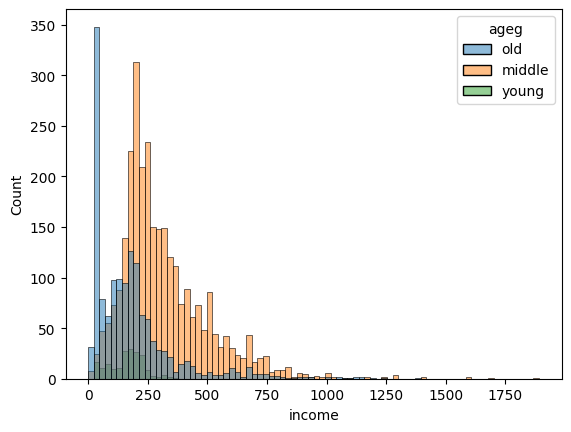

In [53]:
sns.histplot(welfare, x='income', hue='ageg')

In [55]:
sex_income = welfare.groupby(['ageg', 'sex'], as_index=False).agg(mean_income=('income','mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,235.104262
1,middle,male,388.250158
2,old,female,109.727503
3,old,male,268.323708
4,young,female,160.042254
5,young,male,162.291667


<Axes: xlabel='ageg', ylabel='mean_income'>

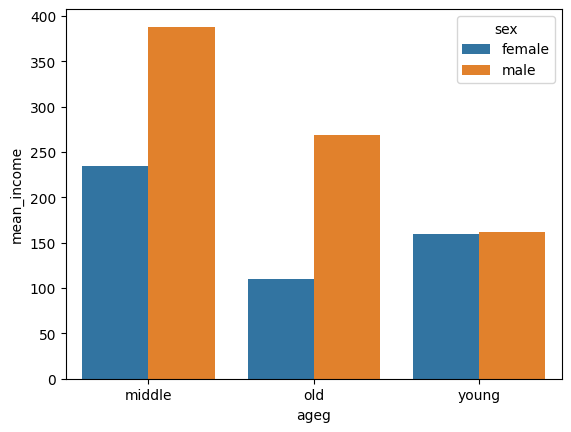

In [57]:
sns.barplot(sex_income, x='ageg', y='mean_income', hue='sex')

In [58]:
sex_age = welfare.groupby(['age', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))
sex_age

,age,sex,mean_income
0,23.0,male,162.000000
1,24.0,female,87.666667
2,24.0,male,155.000000
3,25.0,female,124.000000
4,25.0,male,186.000000
...,...,...,...
140,93.0,male,27.000000
141,94.0,female,27.000000
142,95.0,female,27.000000
143,95.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

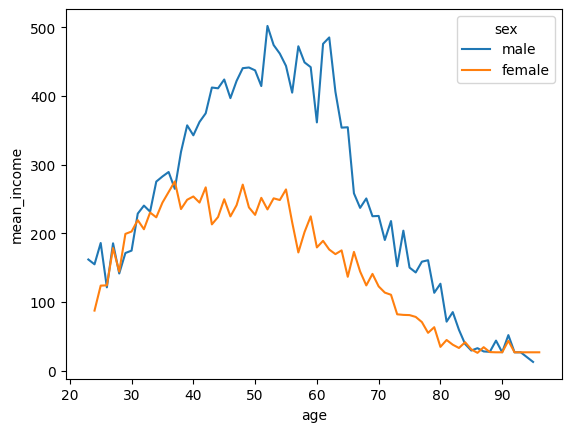

In [60]:
sns.lineplot(sex_age, x='age', y='mean_income', hue='sex')